# Análise passo a passo com Jupyter Notebook
## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.preprocessing import StandardScaler

## Gerando gráficos para análise da dispersão
Removemos as datas, pois não serão utilizadas na análise. Em seguida geramos os gráficos com *seaborn*

In [2]:
seattle = pd.read_csv('../seattle-weather.csv')
seattle = seattle.drop('date', axis=1)

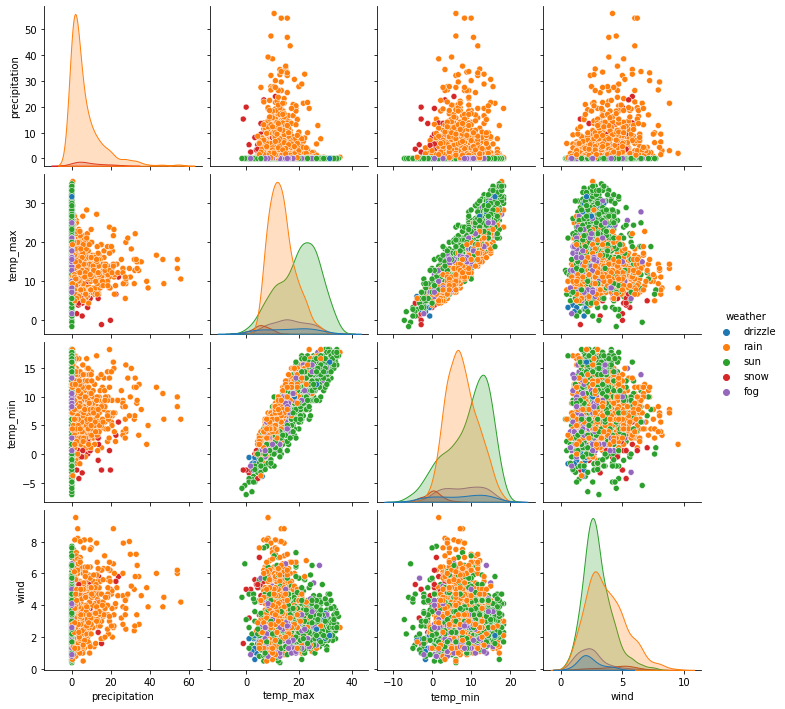

In [3]:
sns.pairplot(seattle, hue='weather')

## Classificação com *SVM*
Aqui separamos os dados e convertemos a previsão do tempo para valores numéricos

In [4]:
seattle['weather'] = seattle['weather'].map(
    {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4})
X = seattle.iloc[:, :-1].values
Y = seattle.iloc[:, -1].values


In [5]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


### Separando os dados de treino e teste
80% dos dados para treino e 20% para teste. random_state = 0 para que a chamada da função não gere resultados diferentes

In [6]:
XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size = 1/5, random_state = 0)

### Normalizando as entradas
Para evitar distorções com *outliers* usamos *StandardScaler*

In [7]:
XTrainScaler = StandardScaler()
XTestScaler = StandardScaler()

XTrain = XTrainScaler.fit_transform(XTrain)
XTest = XTestScaler.fit_transform(XTest)

### Treinamento do *SVM*
Note que o algoritmo *SVM* pode gerar classisficações diferentes a depender da função *kernel* escolhida  
Para esta análise vamos testar 3 *kernels* diferentes: *rbf*, *poly* e *linear*

In [8]:
SeattleClassify_rbf = SVC(kernel='rbf')
SeattleClassify_rbf.fit(XTrain, YTrain)

SeattleClassify_poly = SVC(kernel='poly')
SeattleClassify_poly.fit(XTrain, YTrain)

SeattleClassify_linear = SVC(kernel='linear')
SeattleClassify_linear.fit(XTrain, YTrain)

SVC(kernel='linear')

### Realizando a previsão

In [9]:
YPredict_rbf = SeattleClassify_rbf.predict(XTest)
YPredict_poly = SeattleClassify_poly.predict(XTest)
YPredict_linear = SeattleClassify_linear.predict(XTest)

YResult_rbf = np.concatenate((YPredict_rbf.reshape(len(YPredict_rbf),1), YTest.reshape(len(YTest),1)),1)
YResult_poly = np.concatenate((YPredict_poly.reshape(len(YPredict_poly),1), YTest.reshape(len(YTest),1)),1)
YResult_linear = np.concatenate((YPredict_linear.reshape(len(YPredict_linear),1), YTest.reshape(len(YTest),1)),1)

### Taxa de acerto do algoritmo
Usamos a matriz de confusão para a análise da previsão de taxa de acerto para saber como o algoritmo se saiu na classificação

In [10]:
print('Teste do SVM para kernel rbf')
cm = confusion_matrix(YTest, YPredict_rbf)
print(cm)
print(accuracy_score(YTest, YPredict_rbf))

print('\nTeste do SVM para kernel poly')
cm = confusion_matrix(YTest, YPredict_poly)
print(cm)
print(accuracy_score(YTest, YPredict_poly))

print('\nTeste do SVM para kernel linear')
cm = confusion_matrix(YTest, YPredict_linear)
print(cm)
print(accuracy_score(YTest, YPredict_linear))

Teste do SVM para kernel rbf
[[  0   0   0   0  10]
 [  0   0   1   0  28]
 [  0   0 104   0  19]
 [  0   0   4   1   1]
 [  0   0  11   0 114]]
0.7474402730375427

Teste do SVM para kernel poly
[[  0   0   1   0   9]
 [  1   0  10   0  18]
 [  0   0 107   0  16]
 [  0   0   3   3   0]
 [  0   0  37   0  88]]
0.6757679180887372

Teste do SVM para kernel linear
[[  0   0   0   0  10]
 [  0   0   0   0  29]
 [  0   0 103   0  20]
 [  0   0   4   2   0]
 [  0   0   0   0 125]]
0.7849829351535836
